In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv("car_price_prediction_.csv")

In [3]:
pd.set_option('display.max_columns',None)
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [5]:
data.size

25000

In [6]:
data.shape

(2500, 10)

In [7]:
data.isnull()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False,False,False,False
2497,False,False,False,False,False,False,False,False,False,False
2498,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [9]:
data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [10]:
Brand=pd.get_dummies(data['Brand']).astype(int)

In [11]:
Brand

,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
2495,1,0,0,0,0,0,0
2496,1,0,0,0,0,0,0
2497,0,0,1,0,0,0,0
2498,1,0,0,0,0,0,0


In [12]:
fuel=pd.get_dummies(data['Fuel Type']).astype(int)

In [13]:
fuel

,Diesel,Electric,Hybrid,Petrol
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
2495,0,0,0,1
2496,0,0,1,0
2497,0,0,1,0
2498,1,0,0,0


In [14]:
trans=pd.get_dummies(data['Transmission']).astype(int)

In [15]:
trans

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
2495,1,0
2496,0,1
2497,0,1
2498,0,1


In [16]:
mode=pd.get_dummies(data['Model']).astype(int)

In [17]:
mode

,3 Series,5 Series,A3,A4,Accord,C-Class,CR-V,Camry,Civic,Corolla,E-Class,Explorer,Fiesta,Fit,Focus,GLA,GLC,Model 3,Model S,Model X,Model Y,Mustang,Prius,Q5,Q7,RAV4,X3,X5
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2496,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [18]:
cond=pd.get_dummies(data['Condition']).astype(int)

In [19]:
cond

,Like New,New,Used
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
2495,1,0,0
2496,1,0,0
2497,1,0,0
2498,1,0,0


In [20]:
data=pd.concat([data,Brand,fuel,trans,mode,cond],axis=1)

In [21]:
data.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model', 'Audi', 'BMW', 'Ford',
       'Honda', 'Mercedes', 'Tesla', 'Toyota', 'Diesel', 'Electric', 'Hybrid',
       'Petrol', 'Automatic', 'Manual', '3 Series', '5 Series', 'A3', 'A4',
       'Accord', 'C-Class', 'CR-V', 'Camry', 'Civic', 'Corolla', 'E-Class',
       'Explorer', 'Fiesta', 'Fit', 'Focus', 'GLA', 'GLC', 'Model 3',
       'Model S', 'Model X', 'Model Y', 'Mustang', 'Prius', 'Q5', 'Q7', 'RAV4',
       'X3', 'X5', 'Like New', 'New', 'Used'],
      dtype='object')

In [22]:
g=data

In [23]:
data.drop(columns=['Brand','Fuel Type','Transmission','Condition','Model'], inplace=True)

In [24]:
X=data.drop(columns=['Price','Car ID'])

In [25]:
X

,Year,Engine Size,Mileage,Audi,BMW,Ford,Honda,Mercedes,Tesla,Toyota,Diesel,Electric,Hybrid,Petrol,Automatic,Manual,3 Series,5 Series,A3,A4,Accord,C-Class,CR-V,Camry,Civic,Corolla,E-Class,Explorer,Fiesta,Fit,Focus,GLA,GLC,Model 3,Model S,Model X,Model Y,Mustang,Prius,Q5,Q7,RAV4,X3,X5,Like New,New,Used
0,2016,2.3,114832,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2018,4.4,143190,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,4.5,181601,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2011,4.1,68682,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2009,2.6,223009,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2020,2.4,22650,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2496,2001,5.7,77701,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2497,2021,1.1,272827,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2498,2002,4.5,229164,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [26]:
y=data['Price']

In [27]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred=model.predict(X_test)

In [32]:
mse=mean_squared_error(y_test,y_pred)
r2_scor=r2_score(y_test,y_pred)

In [33]:
mse

675514505.2209296

In [34]:
r2_scor

-0.003932811918797574

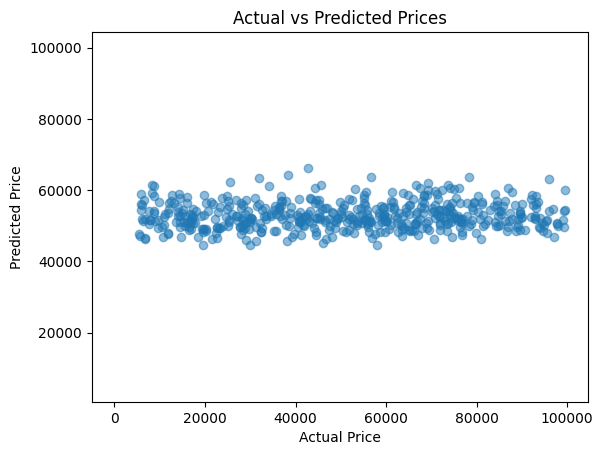

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test, ] ) # perfect prediction line
plt.show()

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial degree set करो (2 से शुरू करो, फिर बढ़ा सकते हो)
poly = PolynomialFeatures(degree=2)

# Train data transform करो
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear Regression on transformed data
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (Degree=2) MSE:", mse_poly)
print("Polynomial Regression (Degree=2) R2:", r2_poly)

Polynomial Regression (Degree=2) MSE: 765744995.3336464
Polynomial Regression (Degree=2) R2: -0.1380311161884369
